<a href="https://colab.research.google.com/github/taylorym06/python/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [7]:
data=pd.read_csv("Loan_data.csv")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd '/content/drive/MyDrive/'

/content/drive/MyDrive


In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
data.shape

(614, 13)

In [11]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
edu=data['Education'].value_counts()

In [16]:
edu

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

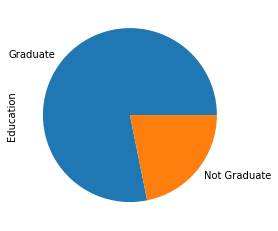

In [17]:
edu.plot(kind='pie')

In [19]:
gen=data['Gender'].value_counts()

In [20]:
gen

Male      489
Female    112
Name: Gender, dtype: int64

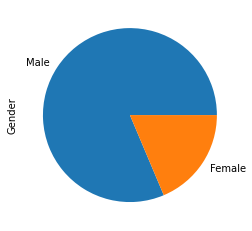

In [21]:
gen.plot(kind='pie')

In [23]:
gen/len(data)

Male      0.796417
Female    0.182410
Name: Gender, dtype: float64

In [24]:
edu/len(data)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [25]:
data_female=data[data['Gender']=='Female']

In [26]:
data_female.shape

(112, 13)

In [28]:
gen_amount=data.groupby('Gender')['LoanAmount'].sum()

In [29]:
type(gen_amount)

pandas.core.series.Series

In [31]:
gen_dict=gen_amount.to_dict()

In [33]:
gen_dict['Female']

13810.0

In [34]:
import numpy as np
data.pivot_table(index='Gender', columns='Education' ,values = 'ApplicantIncome', aggfunc=[np.sum])

sum             
Education Graduate Not Graduate
Gender                         
Female      427475        92594
Male       2253122       410197